## Model validation on the Iris dataset

In [1]:
#### PACKAGE IMPORTS ####
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [2]:
from tensorflow.keras import initializers

In [3]:
iris_data = datasets.load_iris()

In [4]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<tr>
<td><img src="data/iris_setosa.jpg" alt="Drawing" style="height: 270px;"/></td>
<td><img src="data/iris_versicolor.jpg" alt="Drawing" style="height: 270px;"/></td>
<td><img src="data/iris_virginica.jpg" alt="Drawing" style="height: 270px;"/></td>
</tr>

#### The Iris dataset

In this assignment, you will use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

#### Load and preprocess the data


In [5]:

def read_in_and_split_data(iris_data):
    data=iris_data['data']
    targets=iris_data['target']
    train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
    return (train_data,test_data,train_targets,test_targets)
    

In [6]:
# Running function to generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [7]:
# Converting targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [8]:
train_data[0].shape


(4,)

In [9]:
initializer = tf.keras.initializers.he_uniform()

In [10]:
print(tf. __version__) 

2.7.0


#### Building the neural network model


Constructing a model to fit to the data using the Sequential API.


In [11]:


def get_model(input_shape):
    model=Sequential([ 
        Dense(64, activation="relu", input_shape=input_shape,kernel_initializer=tf.keras.initializers.he_uniform(),bias_initializer=initializers.Ones()),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(64,activation="relu"),
        Dense(64,activation="relu"),
        Dense(64,activation="relu"),
        Dense(64,activation="relu"),
        Dense(3,activation='softmax')
    ])
    return model

    
    

In [12]:

model = get_model(train_data[0].shape)

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4

#### Compiling the model


In [14]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)


In [15]:

def compile_model(model):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

    
    

In [16]:
# Run your function to compile the model

compile_model(model)

#### Fitting the model to the training data


In [17]:

def train_model(model, train_data, train_targets, epochs):
    history=model.fit(train_data,train_targets,epochs=epochs,validation_split=0.15,batch_size=40,verbose=False)
    return history

    
    

Run the following cell to run the training for 800 epochs.

In [18]:
# Run your function to train the model

history = train_model(model, train_data, train_targets, epochs=800)

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



Plotting the curves:
* Epoch vs accuracy
* Epoch vs loss


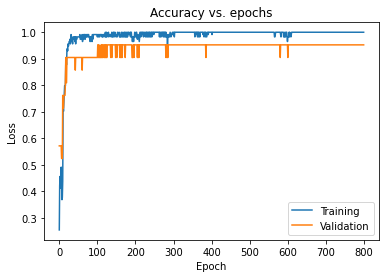

In [21]:


try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

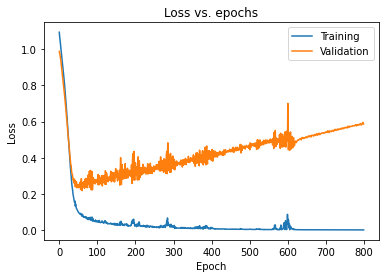

In [22]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

The model seems to be overfit

#### Reducing overfitting in the model

Trying with the reguarized model

In [23]:


def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model=Sequential([ 
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay) ,activation="relu", input_shape=input_shape,kernel_initializer=tf.keras.initializers.he_uniform(),bias_initializer=initializers.Ones()),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dropout(dropout_rate),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        BatchNormalization(),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dropout(dropout_rate),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(3,activation='softmax')
    ])
    return model
        

    
    

#### Instantiate, compile and train the model

In [24]:
# Instantiating the model, using a dropout rate and weight decay cofficient

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [25]:
# Compile the model

compile_model(reg_model)

In [26]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

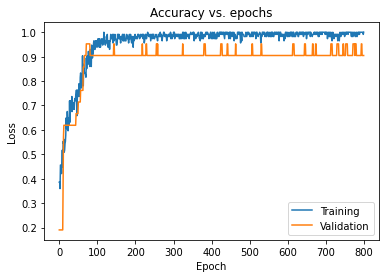

In [27]:


try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

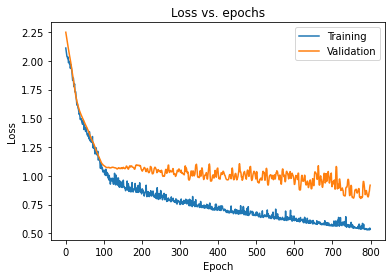

In [28]:


plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
Lets use callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.


In [29]:

def get_callbacks():
    callback_es=tf.keras.callbacks.EarlyStopping(patience=30,monitor='val_loss',mode='min')
    callback_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,patience=20)
    return (callback_es,callback_lr)
    

    
    

Run the cell below to instantiate and train the regularised model with the callbacks.

In [30]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [31]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.

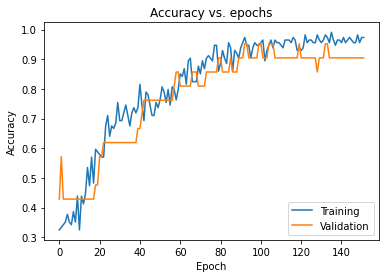

In [32]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

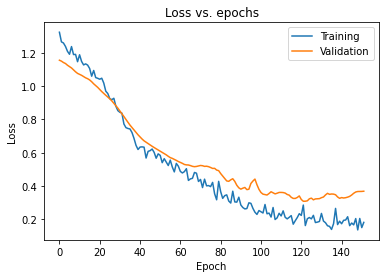

In [33]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [34]:
# Evaluate the model on the test set
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.376
Test accuracy: 86.67%
